In [154]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
#import python_utils_jjm as utils_jjm
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/')
import dlc_utils
#import miniscope_analysis as ma 
#import caiman

In [88]:
reload(dlc_utils)

<module 'dlc_utils' from '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/dlc_utils.py'>

In [126]:
## path to CNMFE data
# dlc_output_file 
dlc_tracking_file = '/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H14_M34_S32_01162020/dlc_output/H14_M34_S32_compiled_session.h5'
dir_path_cnmfe = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/22-Mar_22_52_02_test_out.mat' 

In [216]:
#have aligned also add in the sys timestamps for the behavior cam frames 
aligned = dlc_utils.downsample_dlc_to_behavior('/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H14_M34_S32_01162020/dlc_output/H14_M34_S32_compiled_session.h5', 
                                               '/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H14_M34_S32_01162020/dlc_output/timestamp.dat')

100%|██████████| 25852/25852 [00:52<00:00, 492.11it/s]


In [14]:
aligned.reset_index(inplace=True)
aligned['msCamFrame'] = aligned.index.values
aligned = aligned.set_index(pd.to_timedelta(np.linspace(0, len(aligned)*(1/20), len(aligned)), unit='s'), drop=False)

In [ ]:
interpolated = dlc_utils.downsample_and_interpolate(aligned, '.05S', '1S', 'linear')

In [155]:
#aligned.to_hdf('/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H14_M34_S32_01162020/dlc_output/H14_M34_S32_dlc_tracking_downsampled.h5', key='df')
#aligned = pd.read_hdf('/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H14_M34_S32_01162020/dlc_output/H14_M34_S32_dlc_tracking_downsampled.h5', key='df')
#interpolated.to_hdf('/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H14_M34_S32_01162020/dlc_output/H14_M34_S32_dlc_tracking_foranalysis.h5', key='df')
interpolated.to_csv('/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H14_M34_S32_01162020/dlc_output/H14_M34_S32_dlc_tracking_foranalysis.csv')

In [127]:
CNMFE_results = sio.loadmat(dir_path_cnmfe)

In [128]:
# find regions where velocity is below a threshold for given number of consecutive frames 

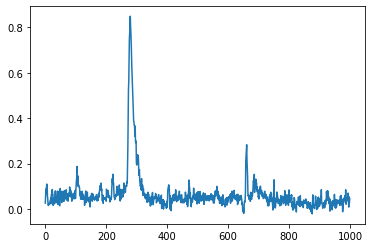

In [149]:
plt.plot(CNMFE_results['C_raw'][1][0:1000])
plt.show()

In [131]:
#generate Z-score for each cell 
C_Zscored = stats.zscore(CNMFE_results['C_raw'][10])


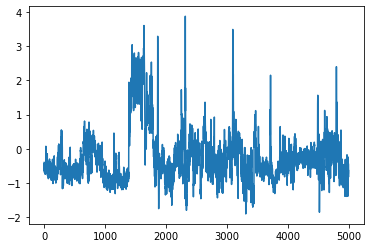

In [138]:
plt.plot(C_Zscored[0:5000])
plt.show()